In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [2]:
num_frames = 100
timestep = 0.05
# t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
t_vals = np.linspace(0.0, (num_frames)*timestep, num_frames+1)
t_vals = t_vals[1:]

# s_vals = np.linspace(0.2, 20.0, 1001)
s_vals = np.linspace(0.2, 1.0, 101)
s_vals = s_vals[:-1]
# s_vals = np.linspace(0, 100, 101)
# s_vals[0] = 1e-10
# s_vals = s_vals[:-1]
# print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

# # get the range of k values
# k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = fft.fftshift(k_vals)
# # k_vals = 2 * np.pi * k_vals
# # print(k_vals)
# print(f"shape of k_vals : {k_vals.shape}")

In [3]:
dk = 1/(r_vals[-1]-r_vals[0])
# we need only the positive k values
k_vals = np.linspace(0.0, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi*dk, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi/dk, np.pi/dk, r_vals.shape[0])
# print(k_vals)
print(k_vals.shape)

(500,)


In [4]:
alpha0 = 0.5
d0 = 2.0

In [5]:
u_test = np.zeros((s_vals.shape[0], k_vals.shape[0]))
for i in range(s_vals.shape[0]):
    for j in range(k_vals.shape[0]):
        u_test[i, j] = s_vals[i]**(alpha0-1) / (s_vals[i]**(alpha0) + d0*k_vals[j]**2)
# print(u_test)

u_test = u_test / np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)


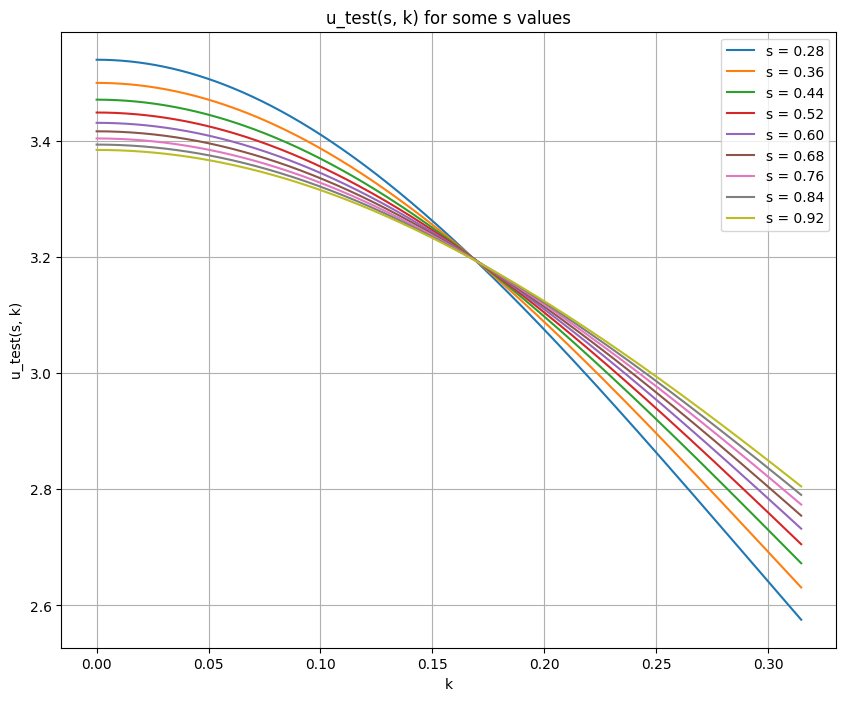

In [6]:
# plot u_test
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_test(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_test(s, k)")
plt.grid()
# plt.ylim(0)
for i in range(0, s_vals.shape[0], s_vals.shape[0]//10):
    if i == 0:
        continue
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

$u(s, k) = \frac{s^{\alpha-1}}{s^{\alpha}+Dk^2}$

In [7]:
# load u.txt and compare with u_test
u = np.loadtxt("u.txt")
print(u.shape)

(100, 500)


average difference for s = 0.22 : 0.05690443334899847


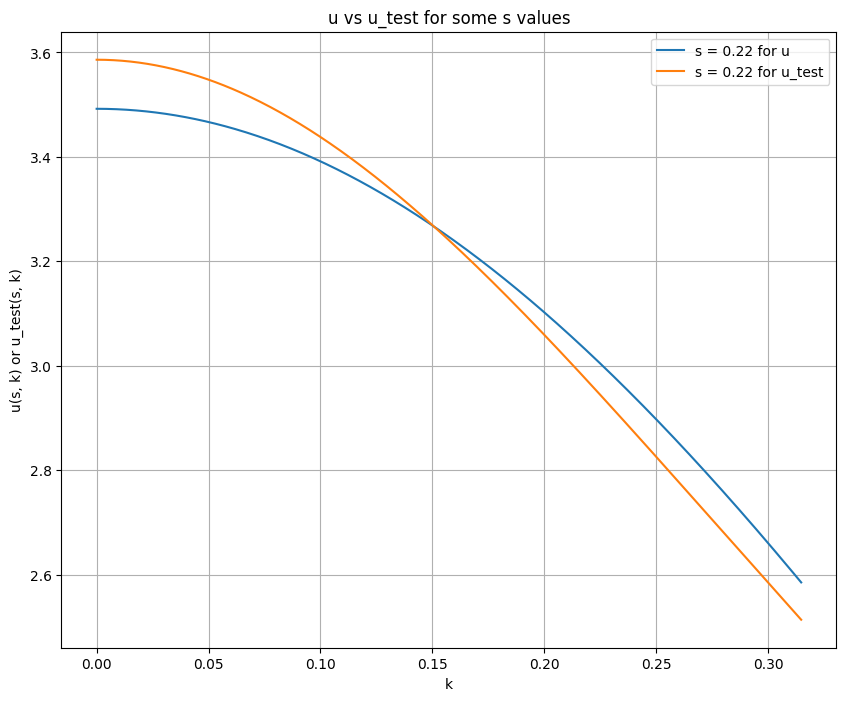

average difference for s = 0.23 : 0.0499285313319683


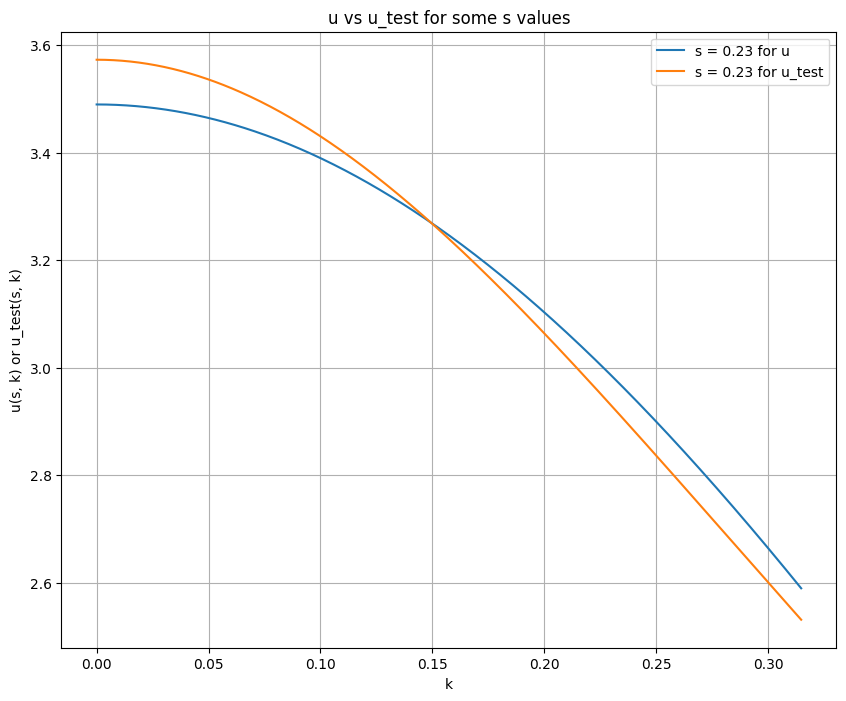

average difference for s = 0.25 : 0.04374971419661081


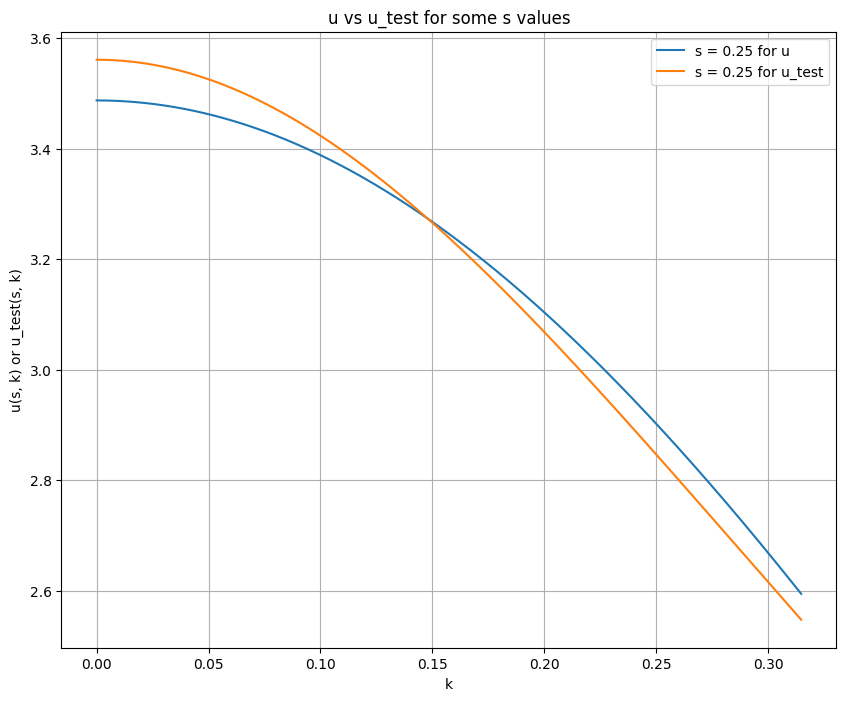

average difference for s = 0.26 : 0.038253517898553184


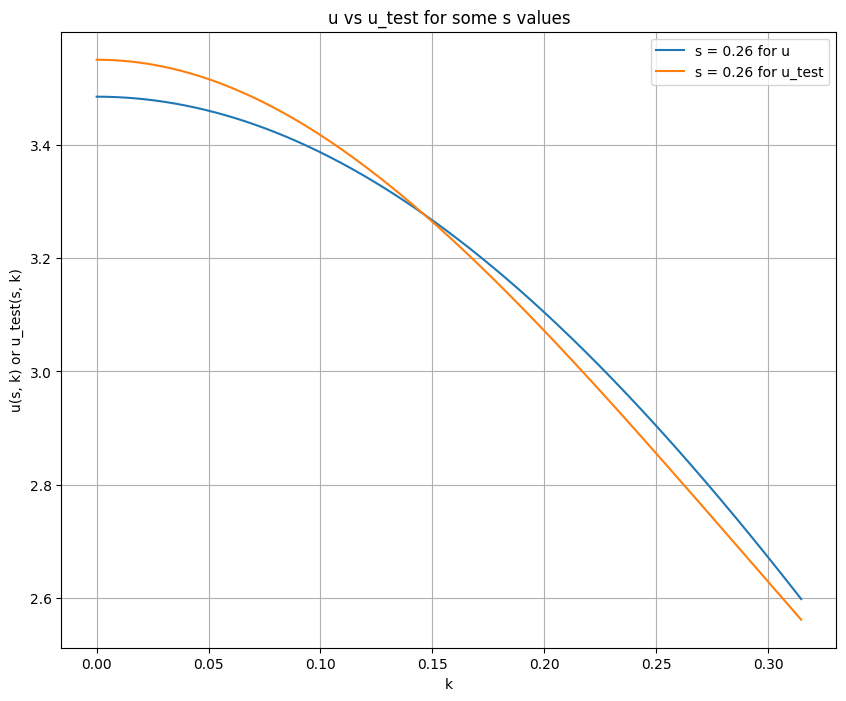

average difference for s = 0.28 : 0.03334768272930952


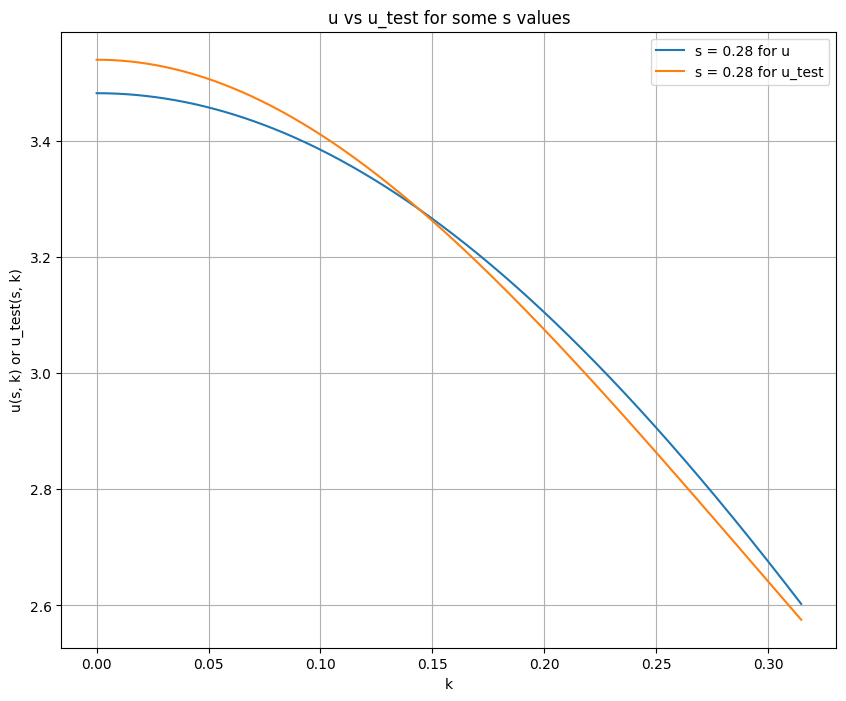

average difference for s = 0.30 : 0.028956903858346233


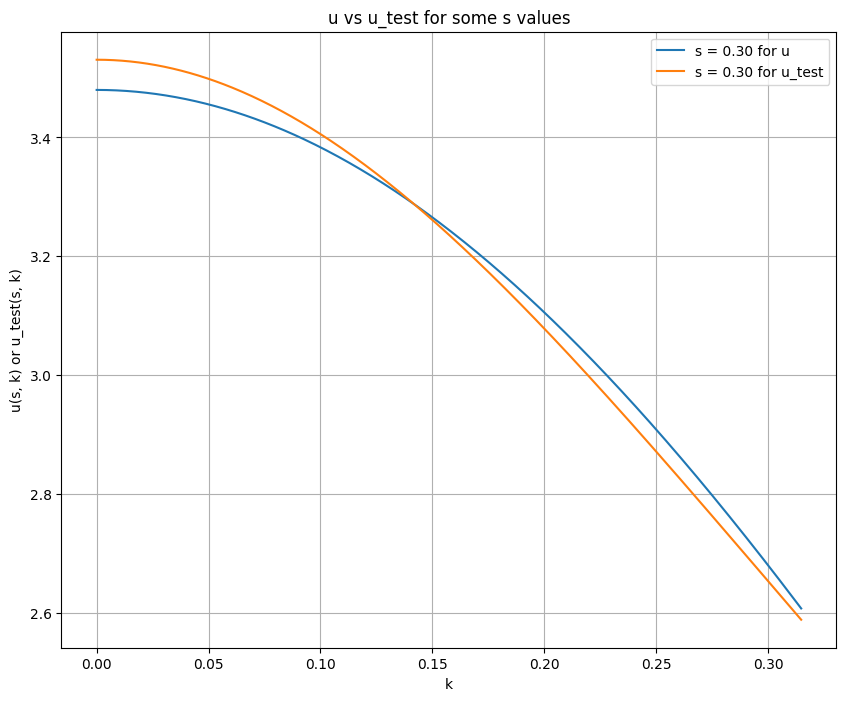

average difference for s = 0.31 : 0.02501942994467935


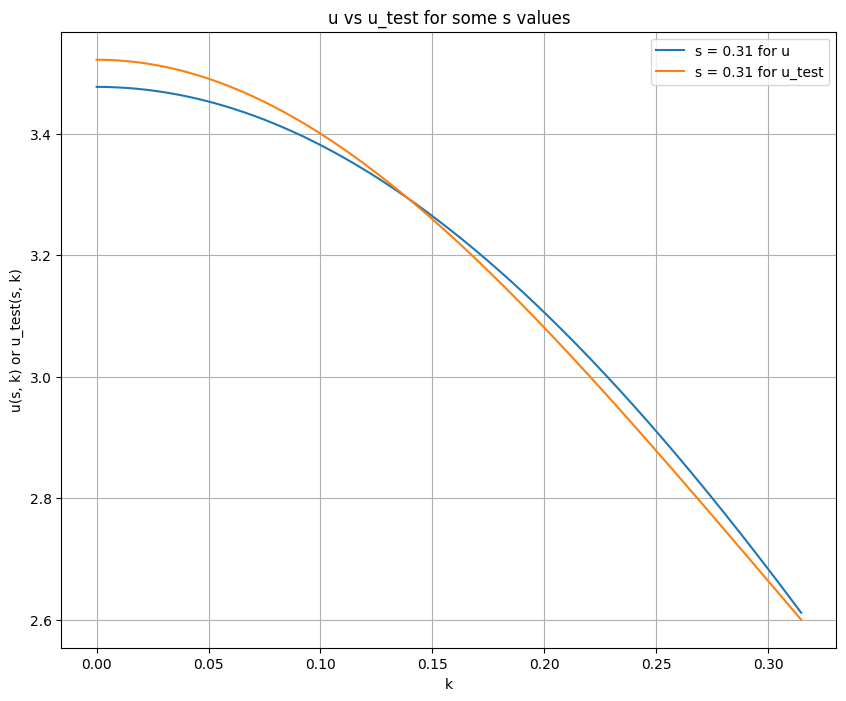

average difference for s = 0.33 : 0.021483815224518605


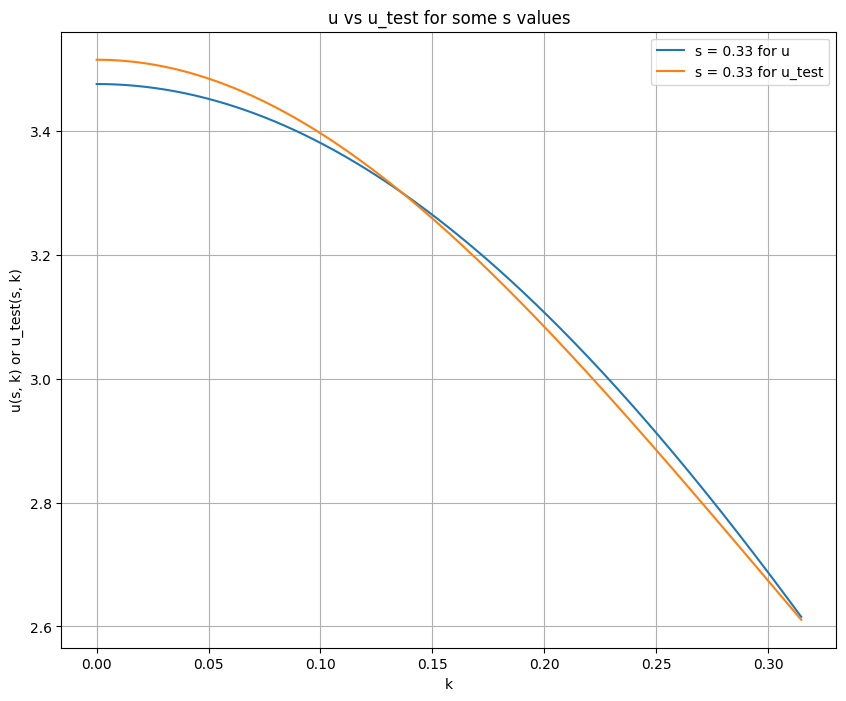

average difference for s = 0.34 : 0.018319907851098105


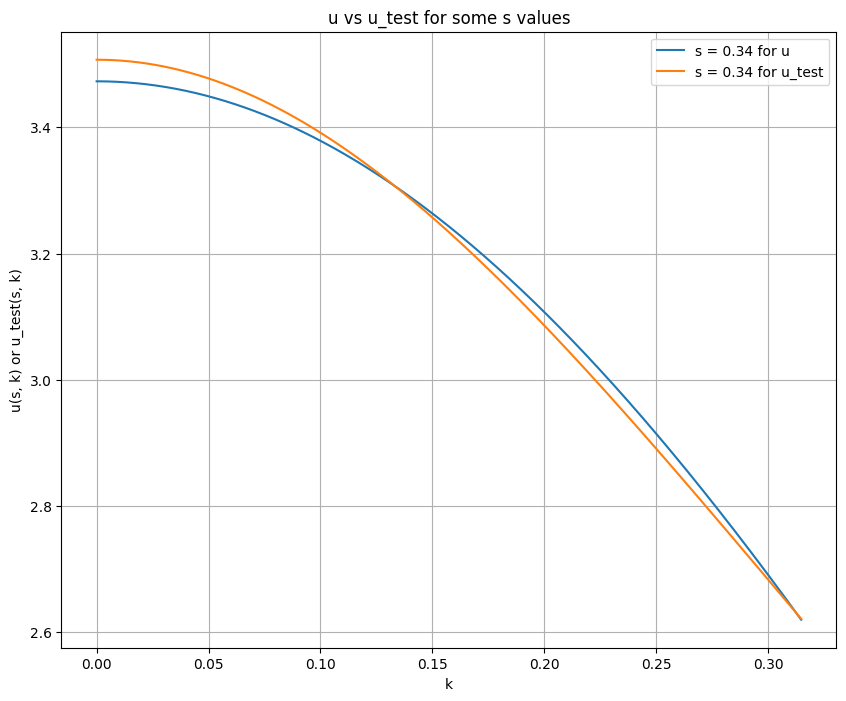

average difference for s = 0.36 : 0.015699339177745228


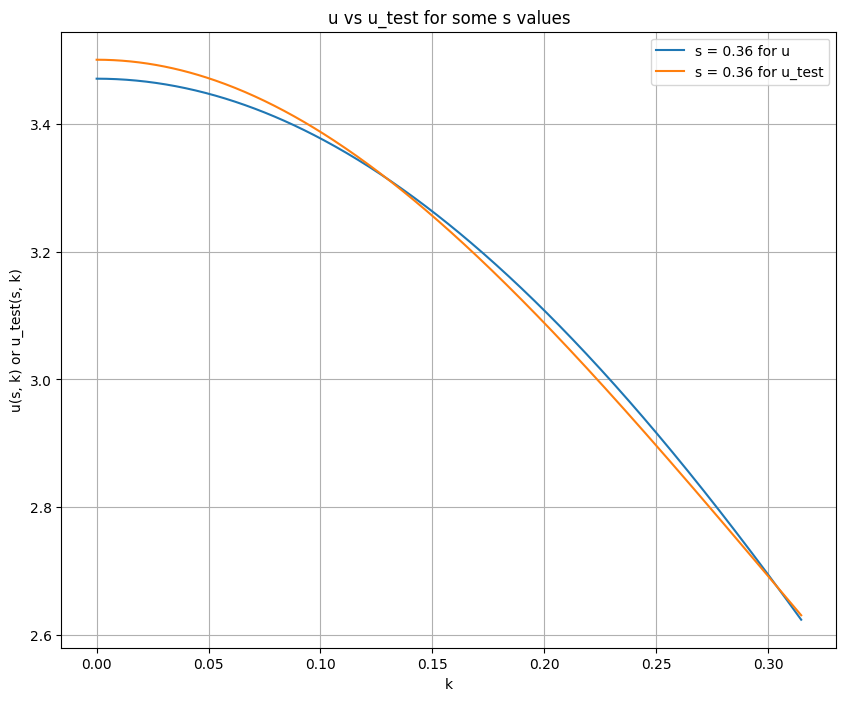

average difference for s = 0.38 : 0.013605533357768398


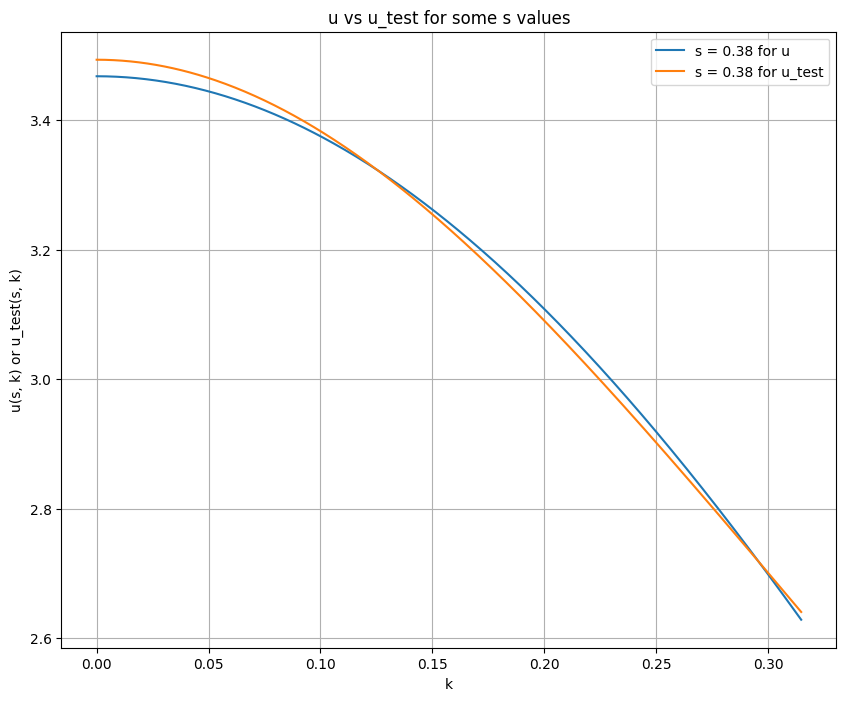

average difference for s = 0.39 : 0.011948359115126667


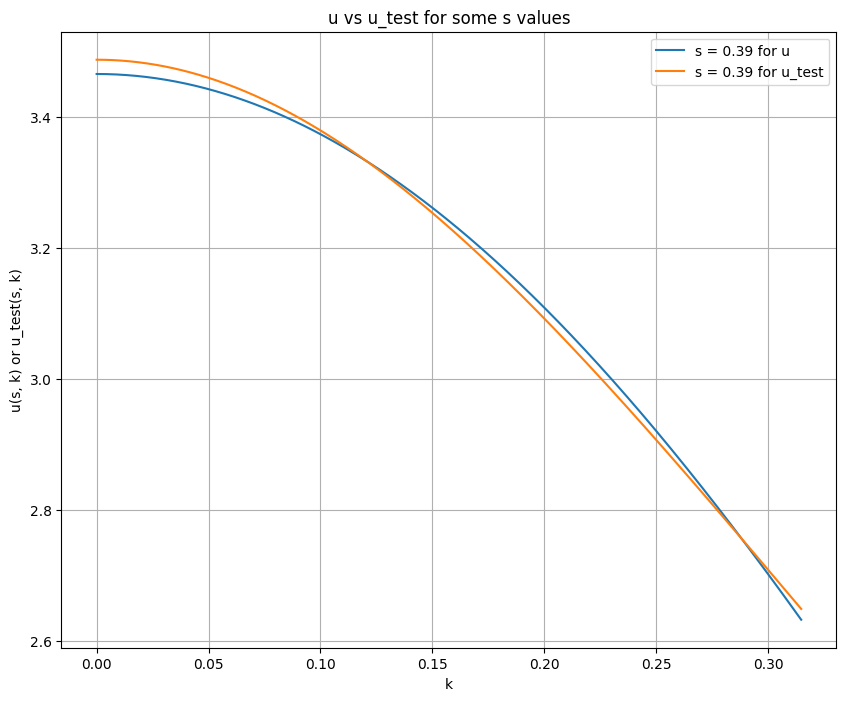

average difference for s = 0.41 : 0.010654217881108331


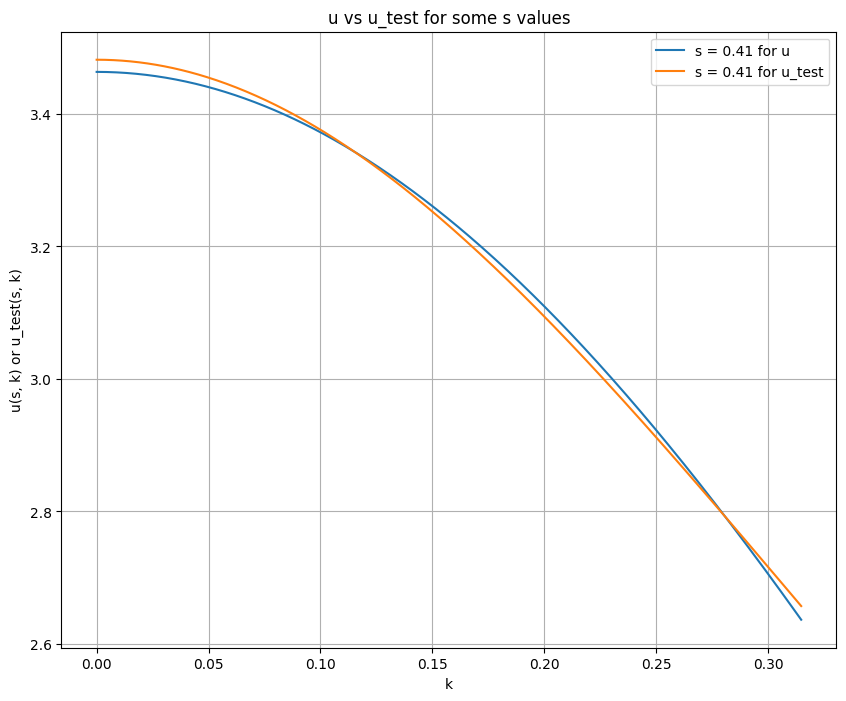

average difference for s = 0.42 : 0.009664885737371814


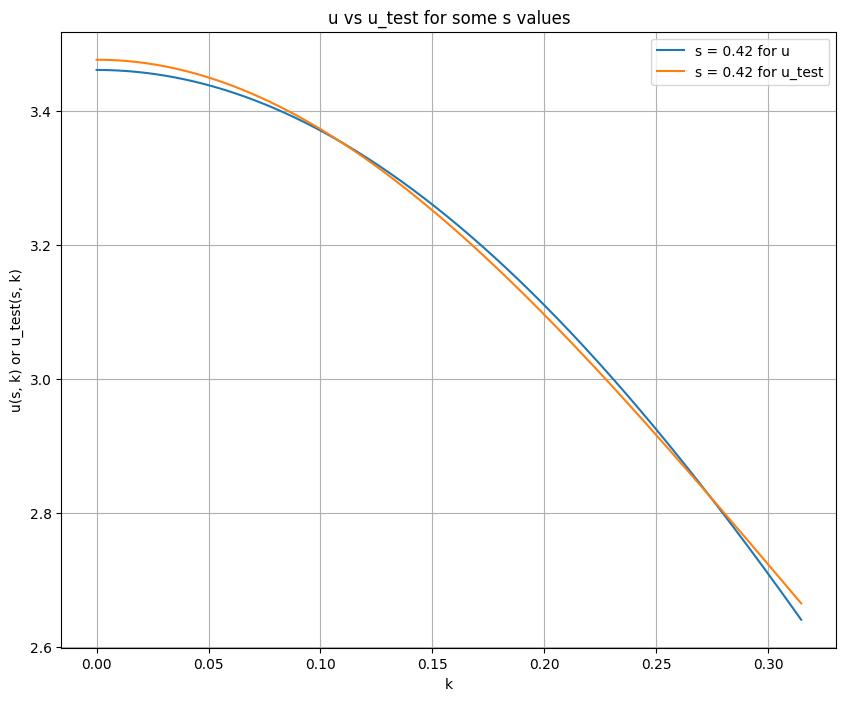

average difference for s = 0.44 : 0.008933761933169691


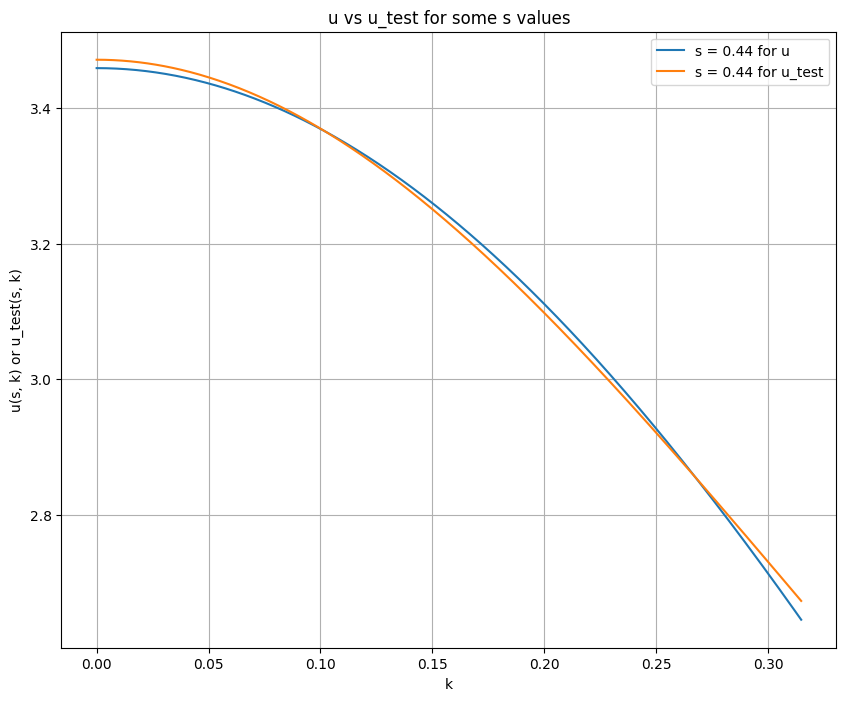

average difference for s = 0.46 : 0.008425284256341524


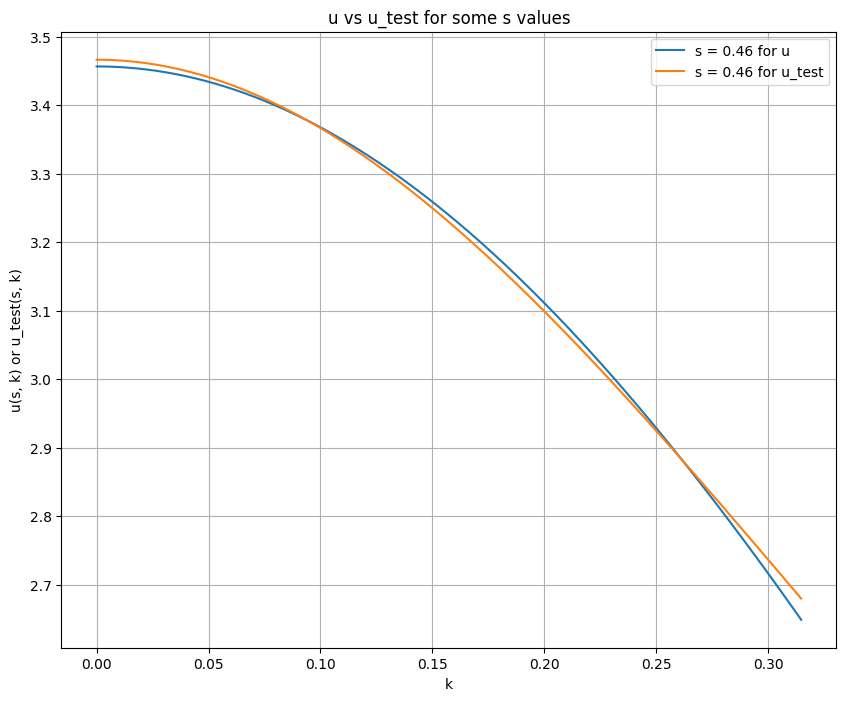

average difference for s = 0.47 : 0.008113248351379635


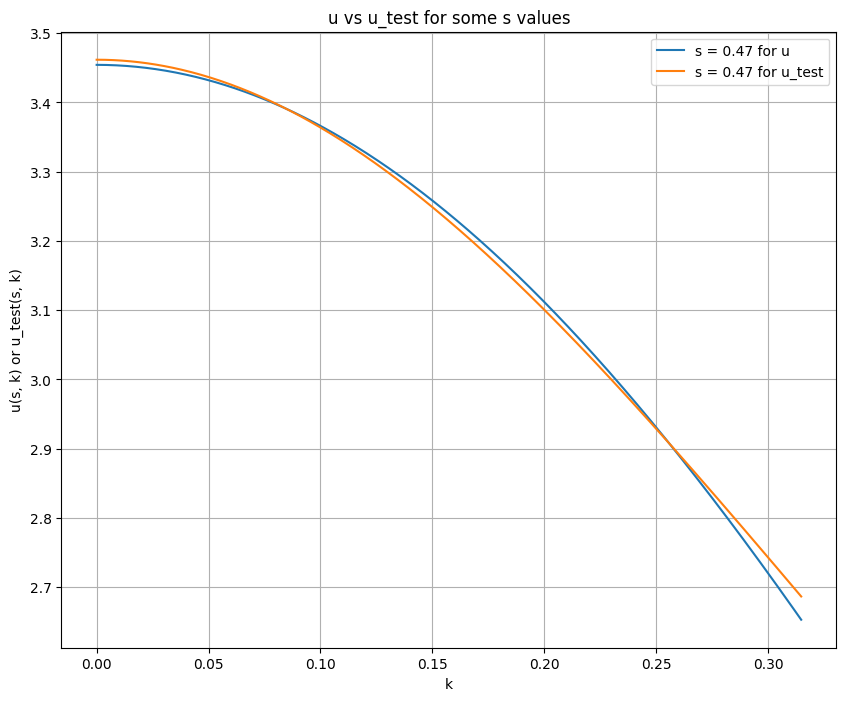

average difference for s = 0.49 : 0.007981256515455807


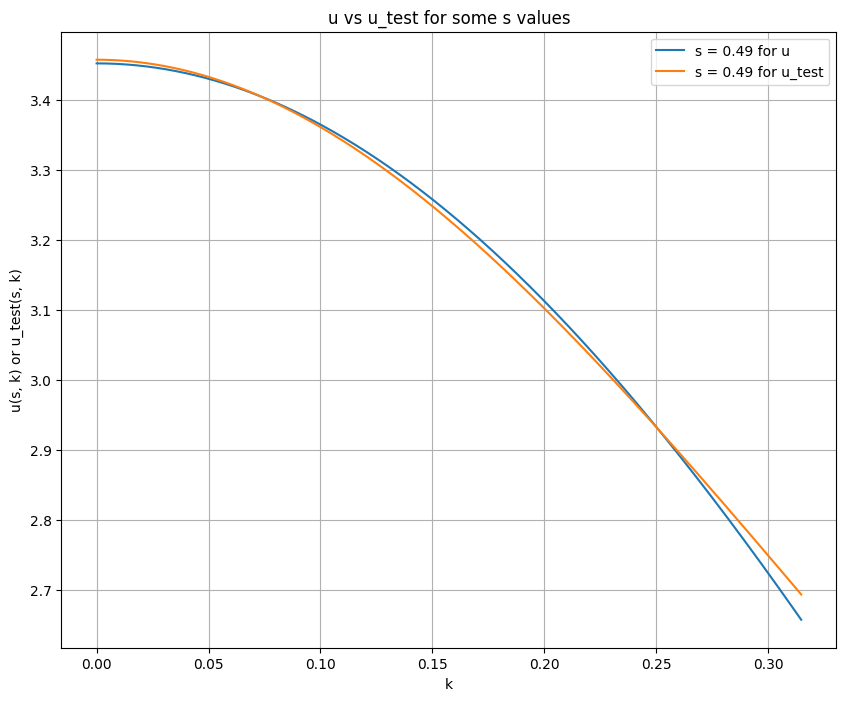

average difference for s = 0.50 : 0.008023782998754612


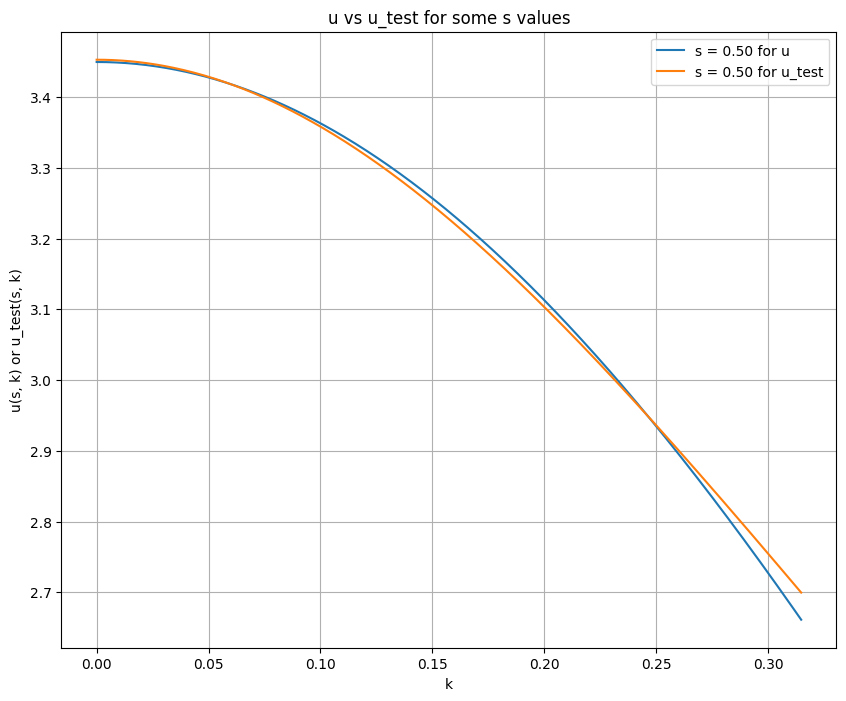

average difference for s = 0.52 : 0.008253868762580795


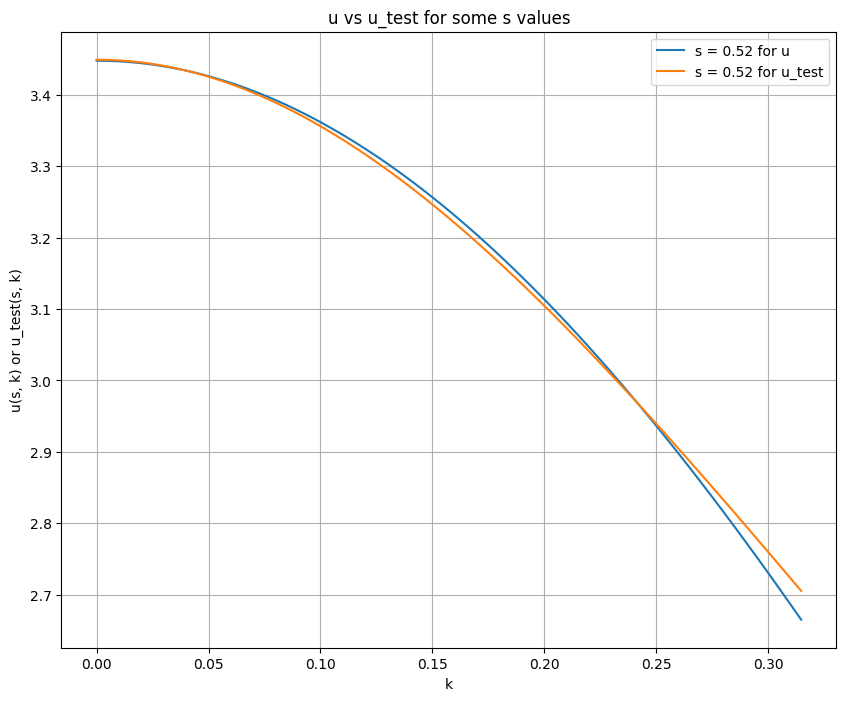

average difference for s = 0.54 : 0.008770718344302425


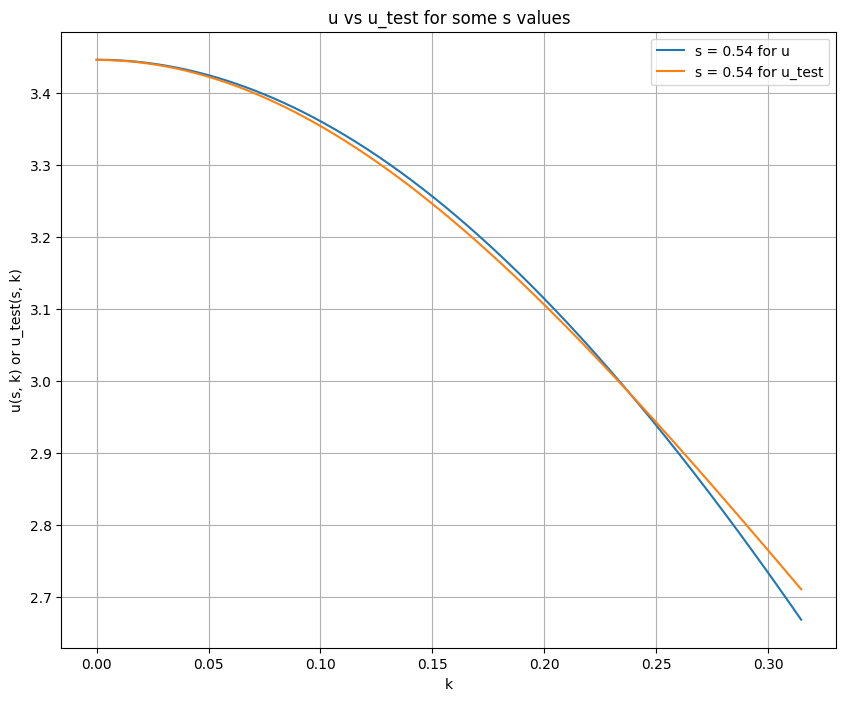

average difference for s = 0.55 : 0.009482285914859652


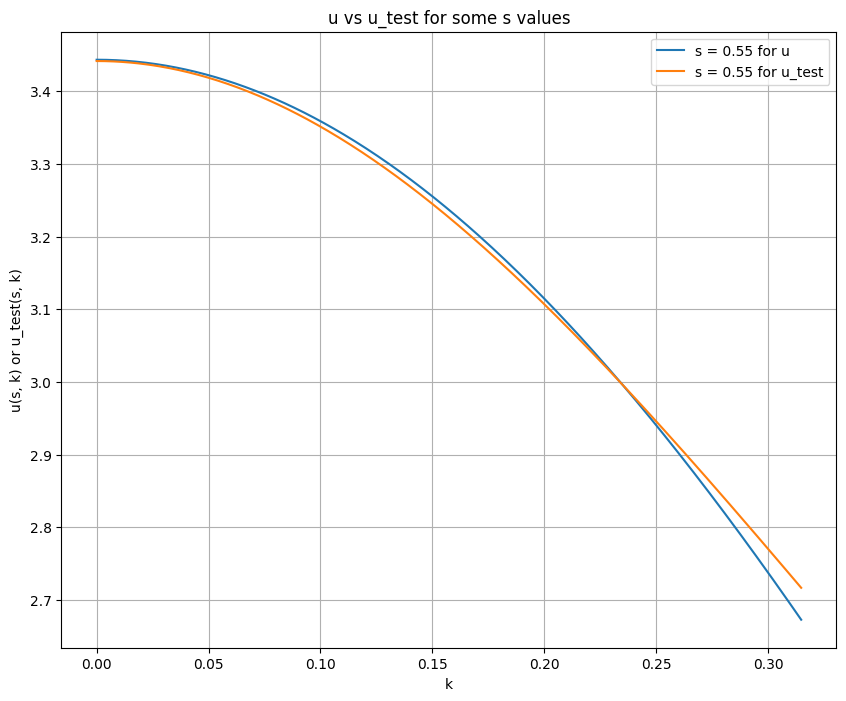

average difference for s = 0.57 : 0.01014808392514603


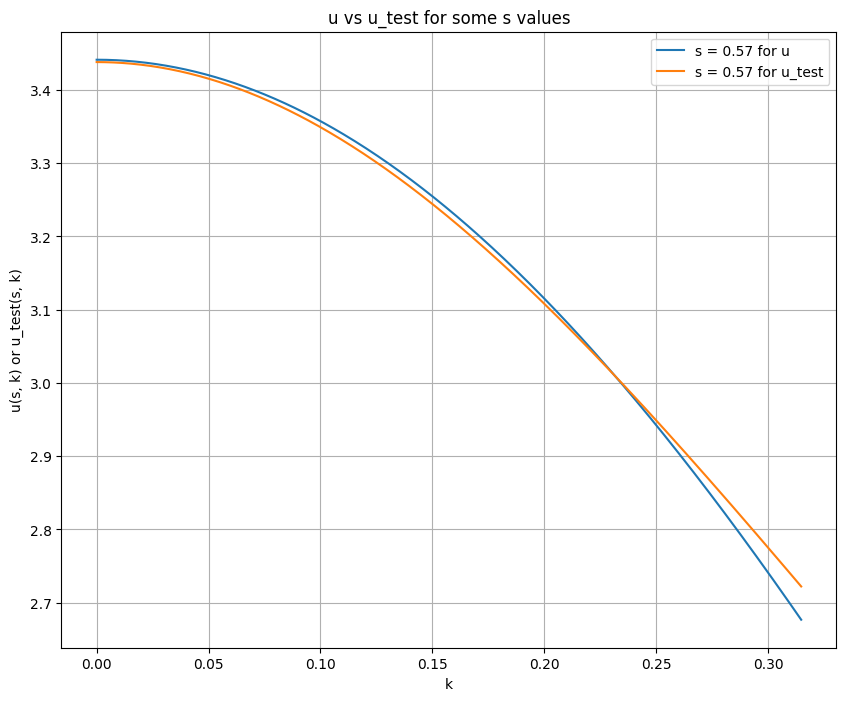

average difference for s = 0.58 : 0.010767728709160734


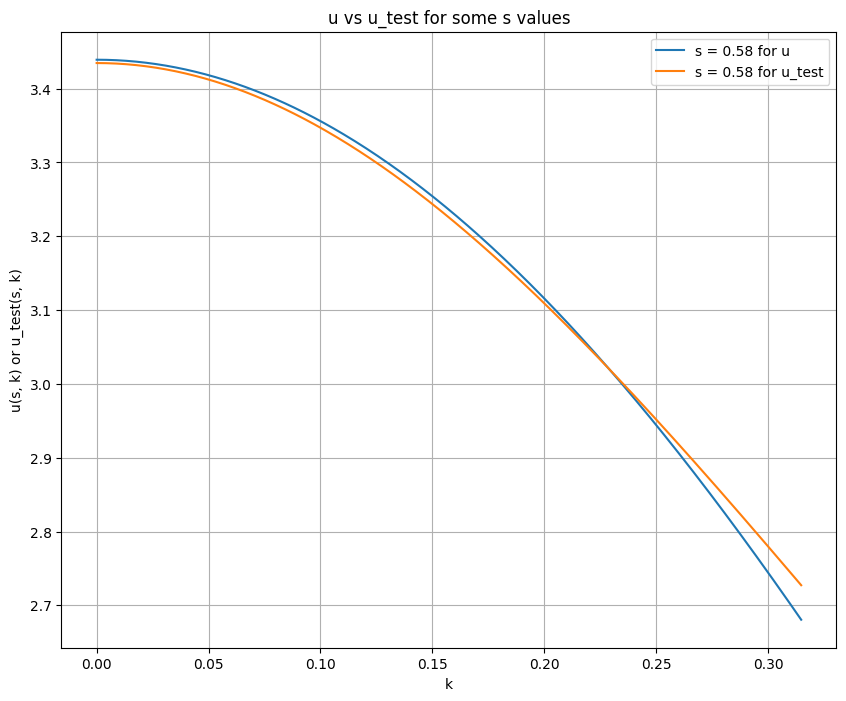

average difference for s = 0.60 : 0.01134167354022885


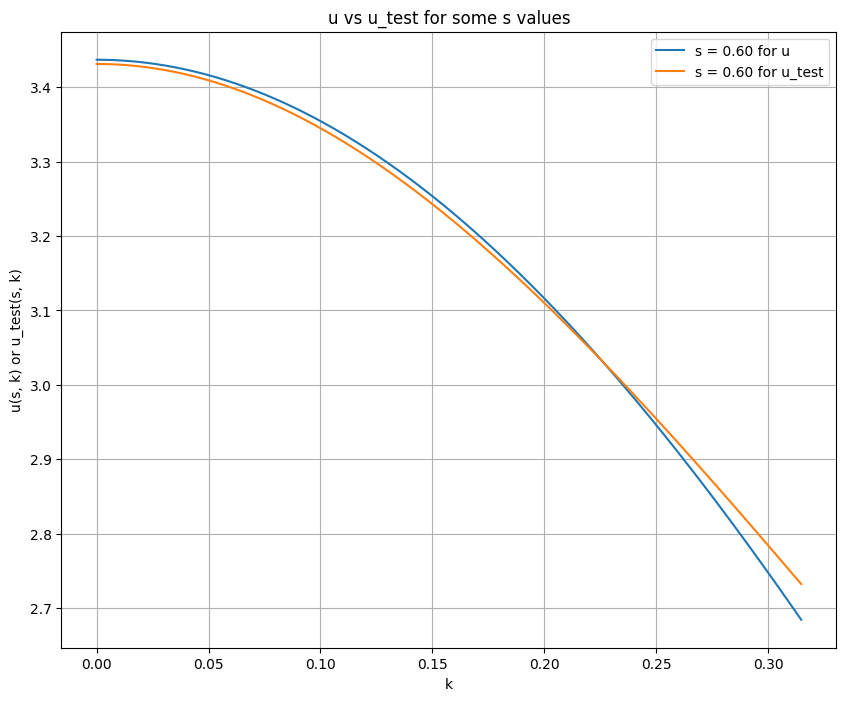

average difference for s = 0.62 : 0.011871004695036401


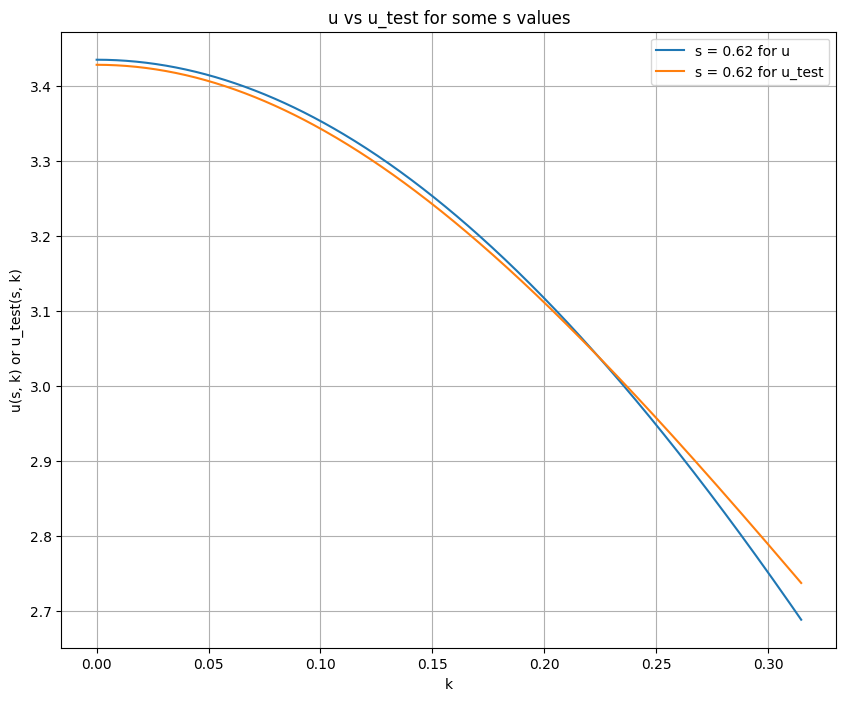

average difference for s = 0.63 : 0.012357516899442601


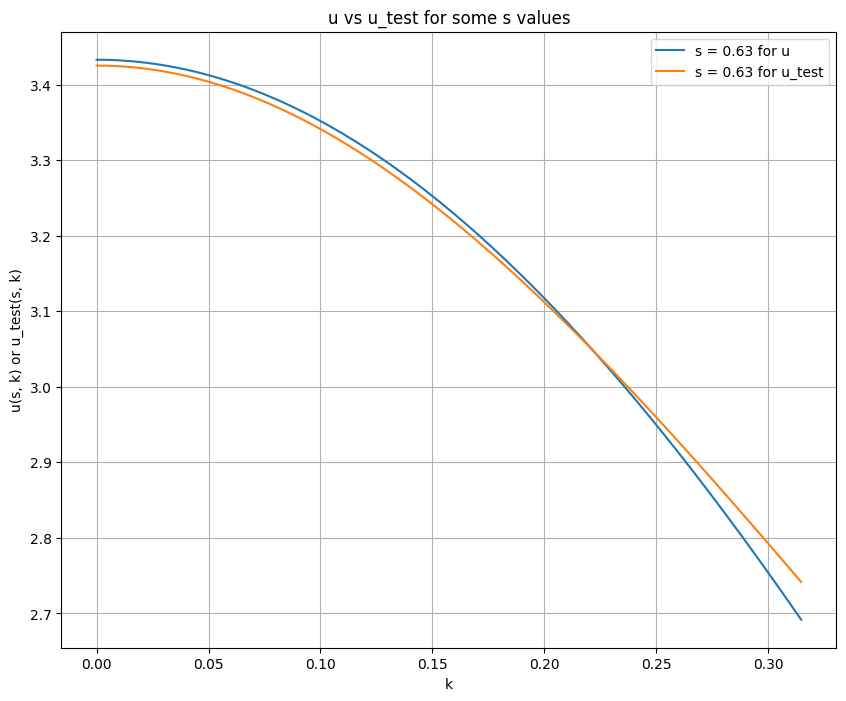

average difference for s = 0.65 : 0.01280281401419077


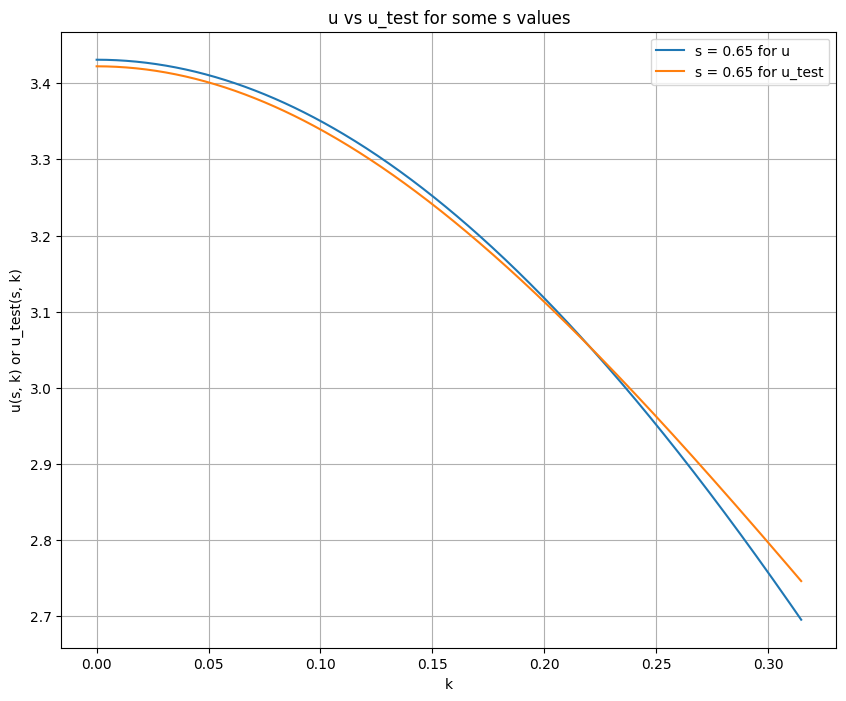

average difference for s = 0.66 : 0.013208958433990581


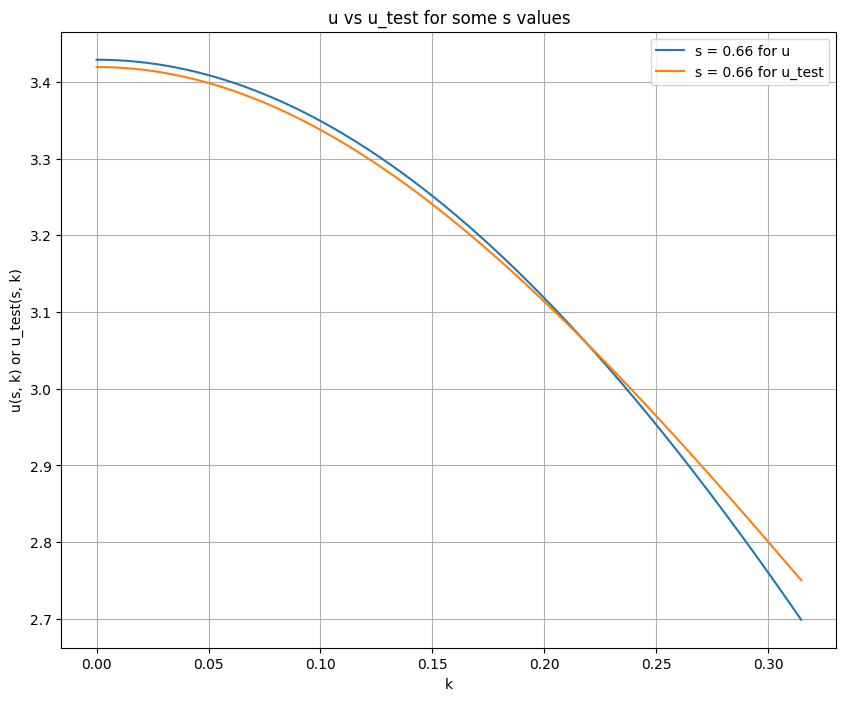

average difference for s = 0.68 : 0.013578159169606422


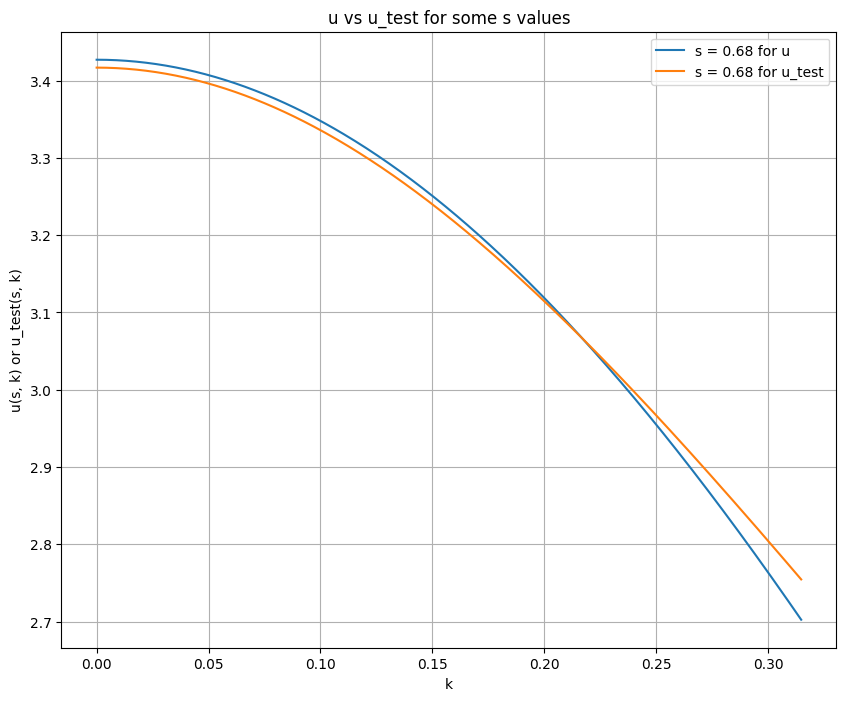

average difference for s = 0.70 : 0.01391243199282426


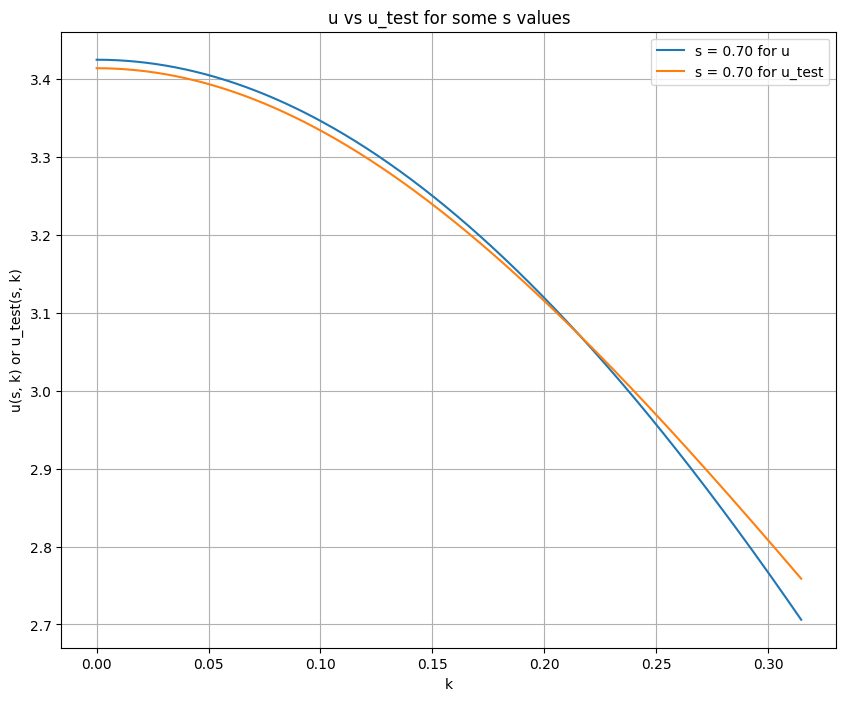

average difference for s = 0.71 : 0.014213931942843726


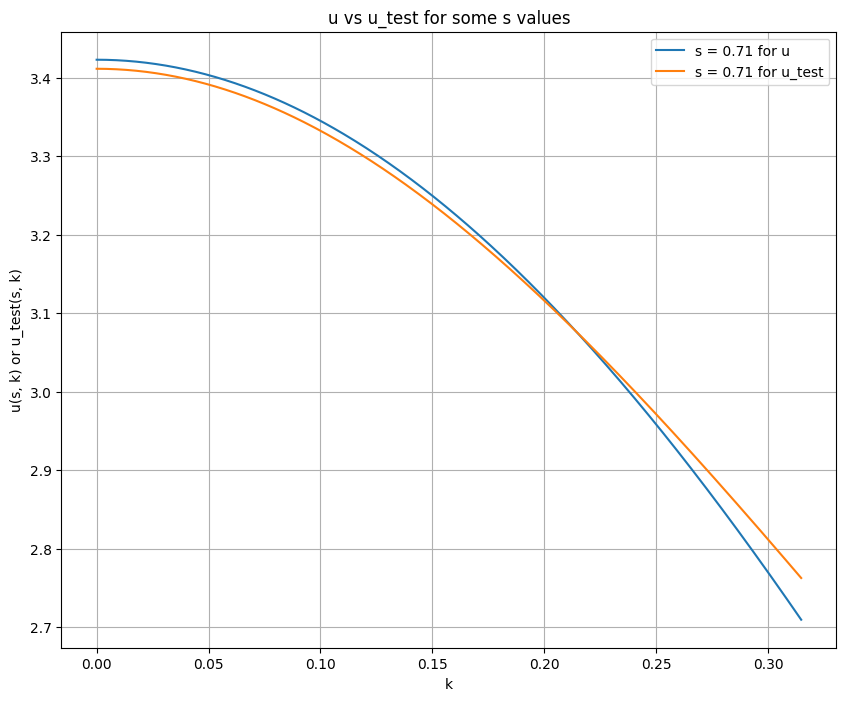

average difference for s = 0.73 : 0.014484747990825058


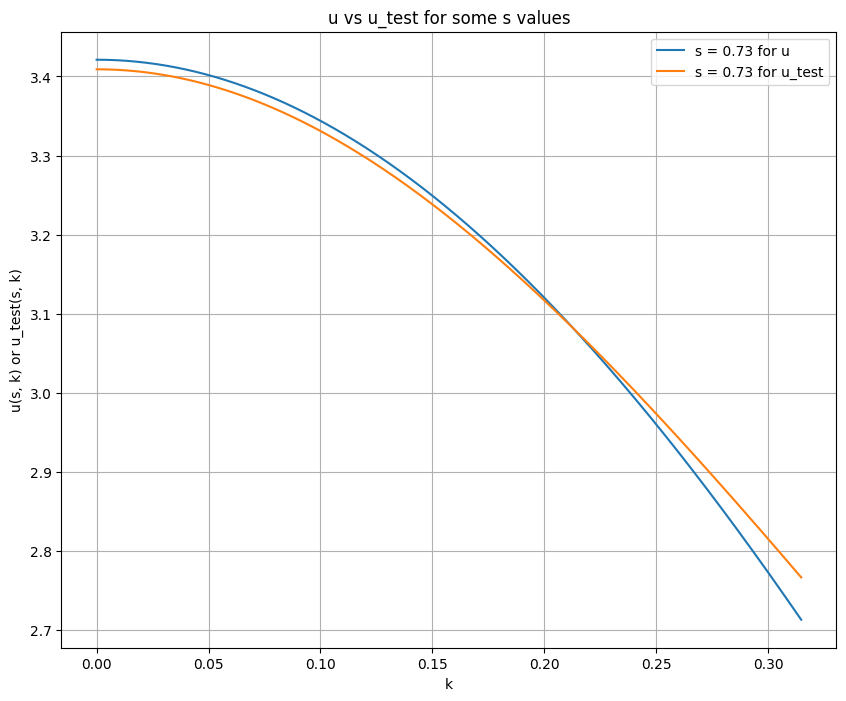

average difference for s = 0.74 : 0.014726844067143382


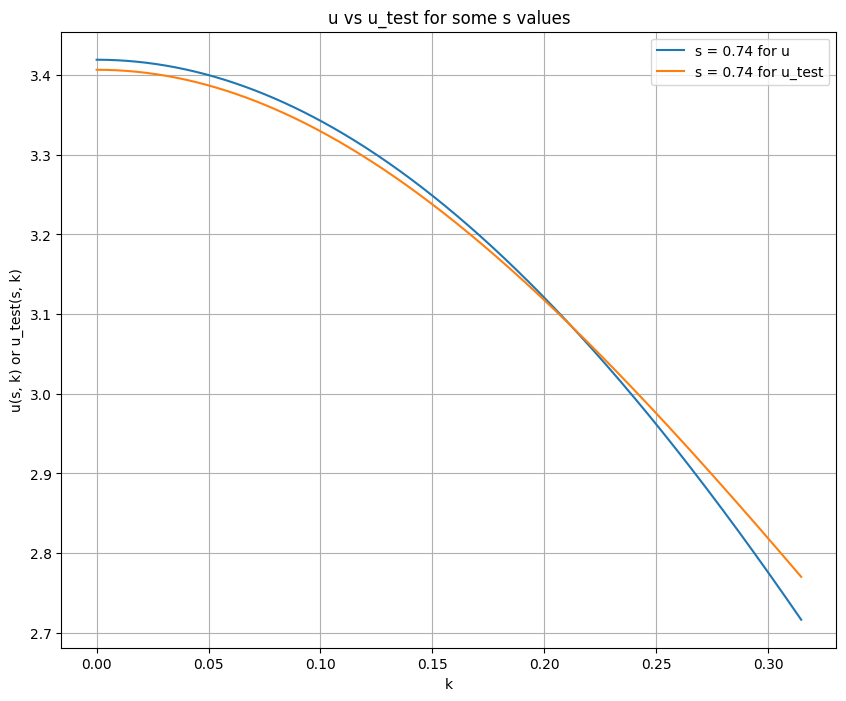

average difference for s = 0.76 : 0.014942390904148064


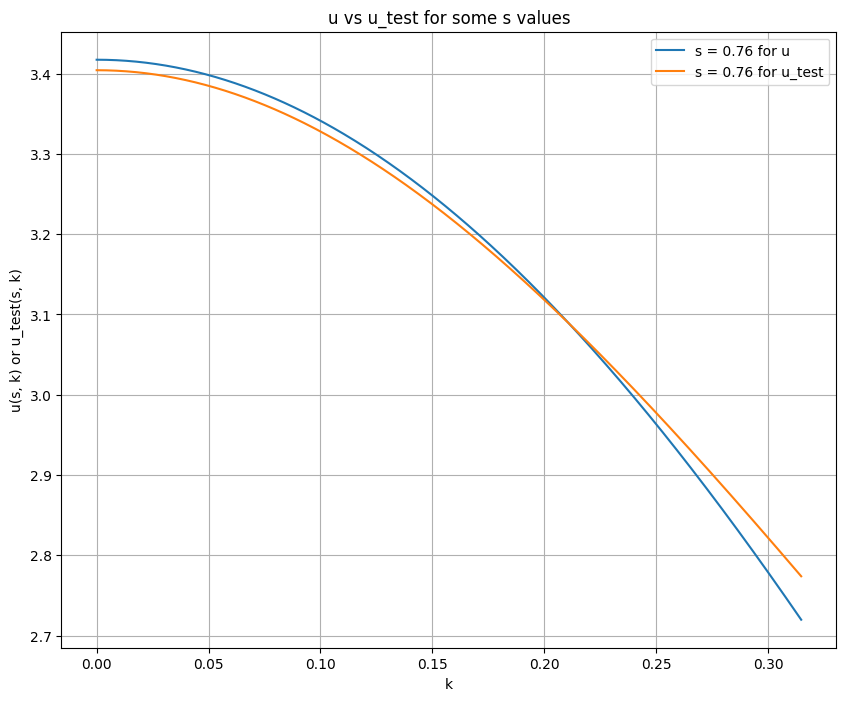

average difference for s = 0.78 : 0.015132947456245173


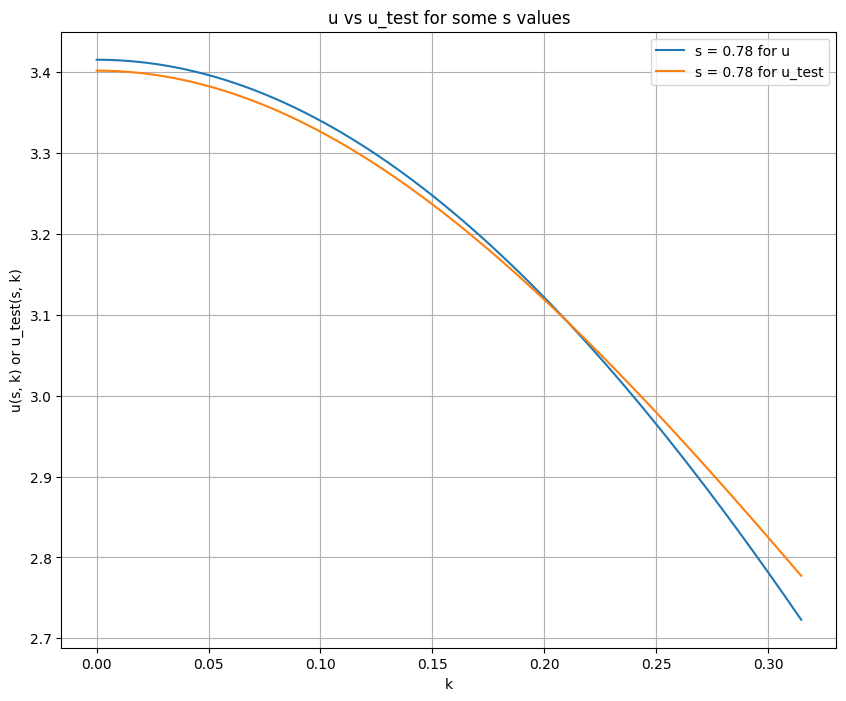

average difference for s = 0.79 : 0.015300541014351726


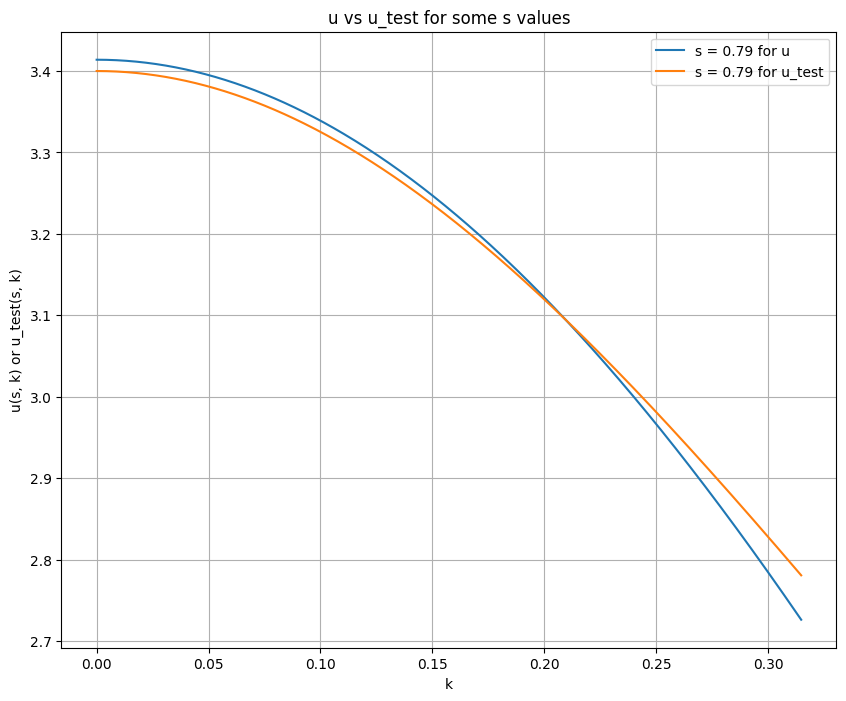

average difference for s = 0.81 : 0.015446728273198233


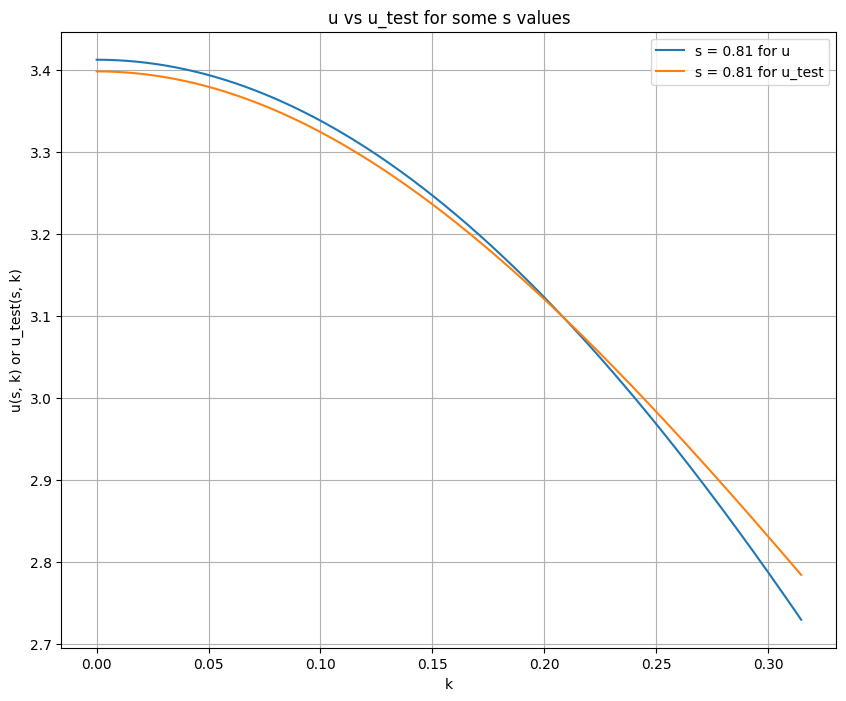

average difference for s = 0.82 : 0.015573090252573245


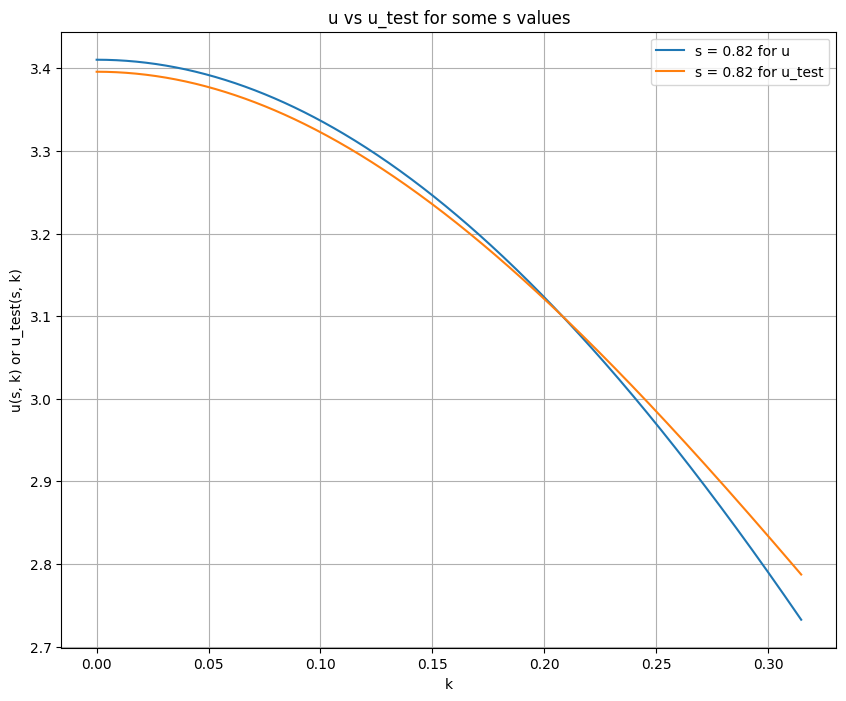

average difference for s = 0.84 : 0.01568113778253498


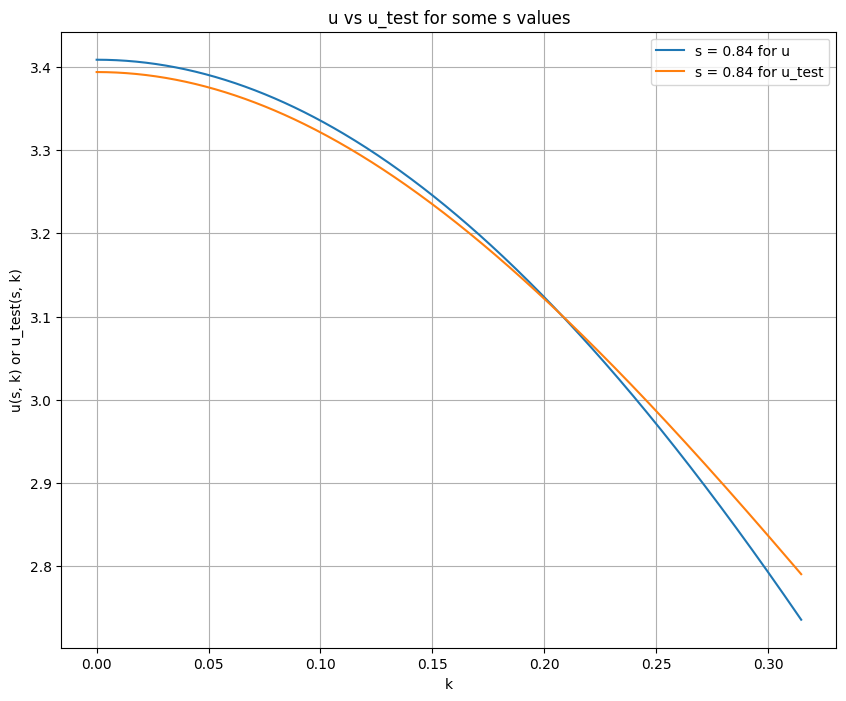

average difference for s = 0.86 : 0.015772275887739752


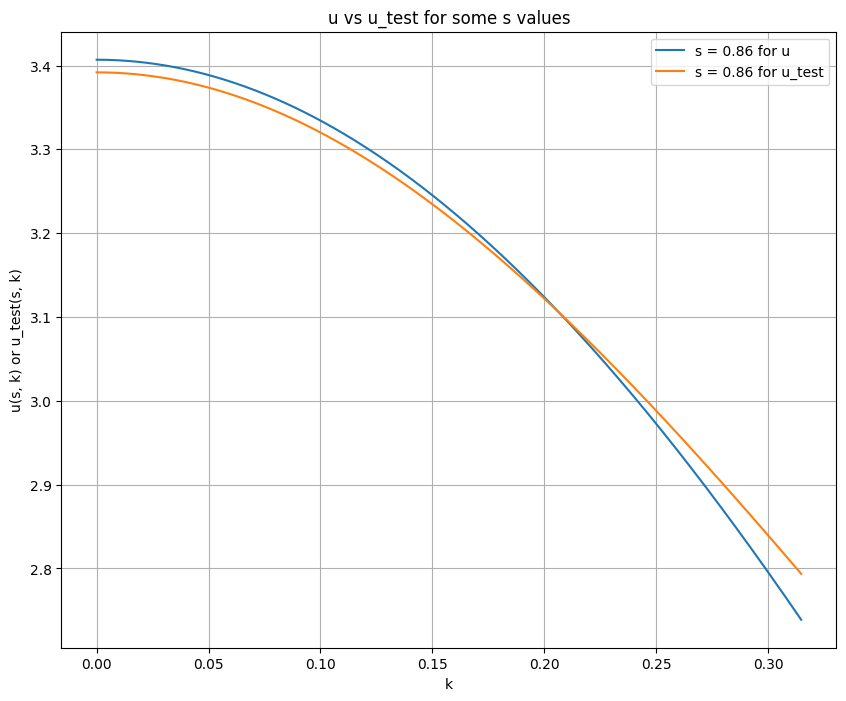

average difference for s = 0.87 : 0.015847811421901583


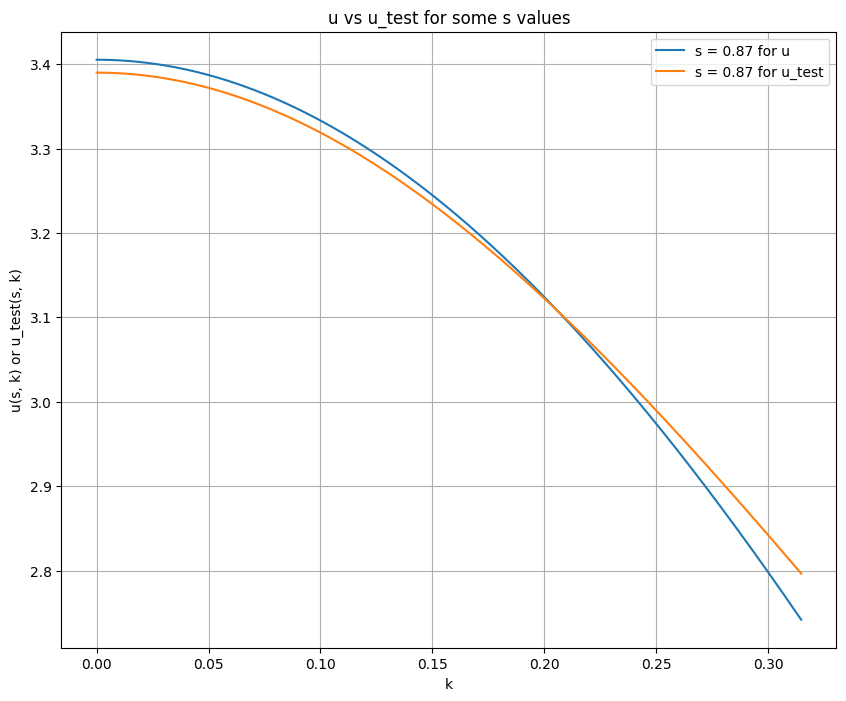

average difference for s = 0.89 : 0.015908960062295387


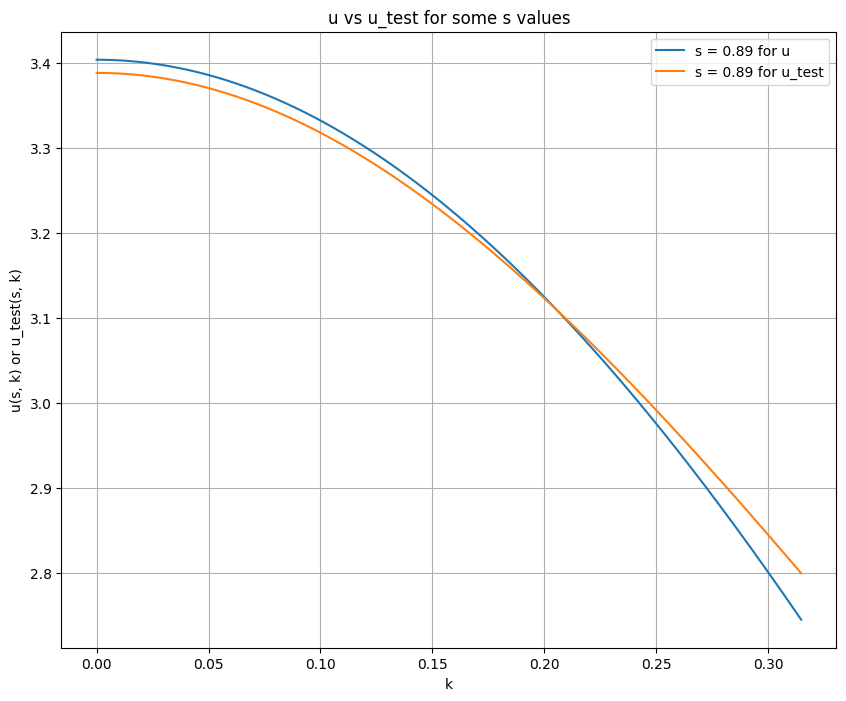

average difference for s = 0.90 : 0.015956981490616348


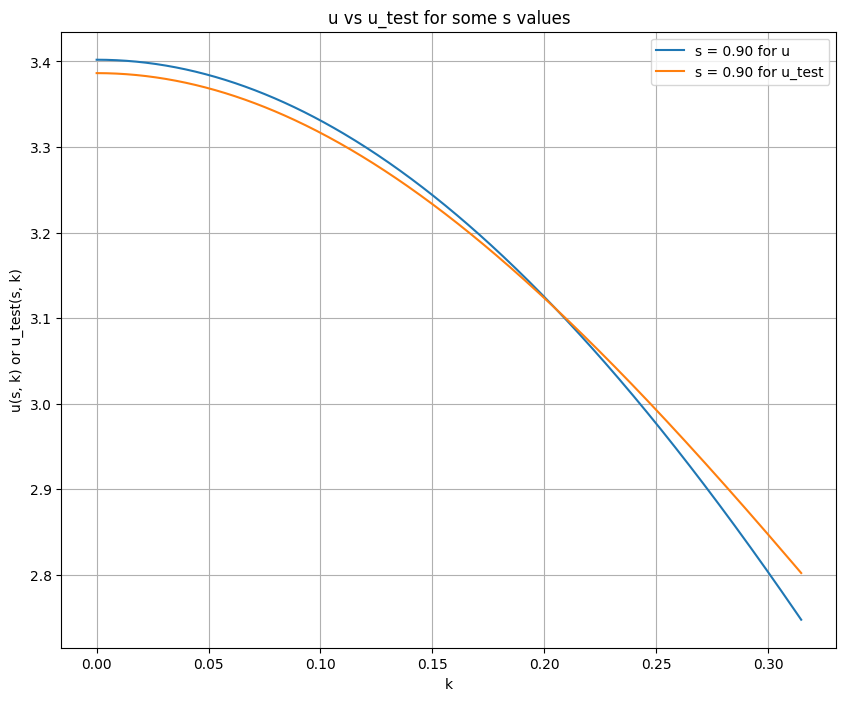

average difference for s = 0.92 : 0.015992881669086405


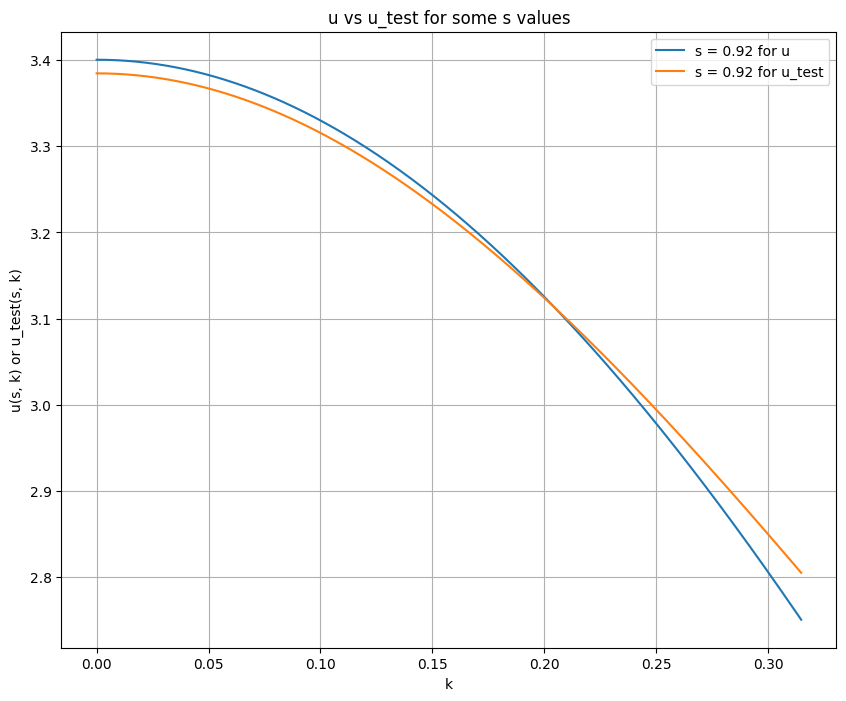

average difference for s = 0.94 : 0.016017585965662367


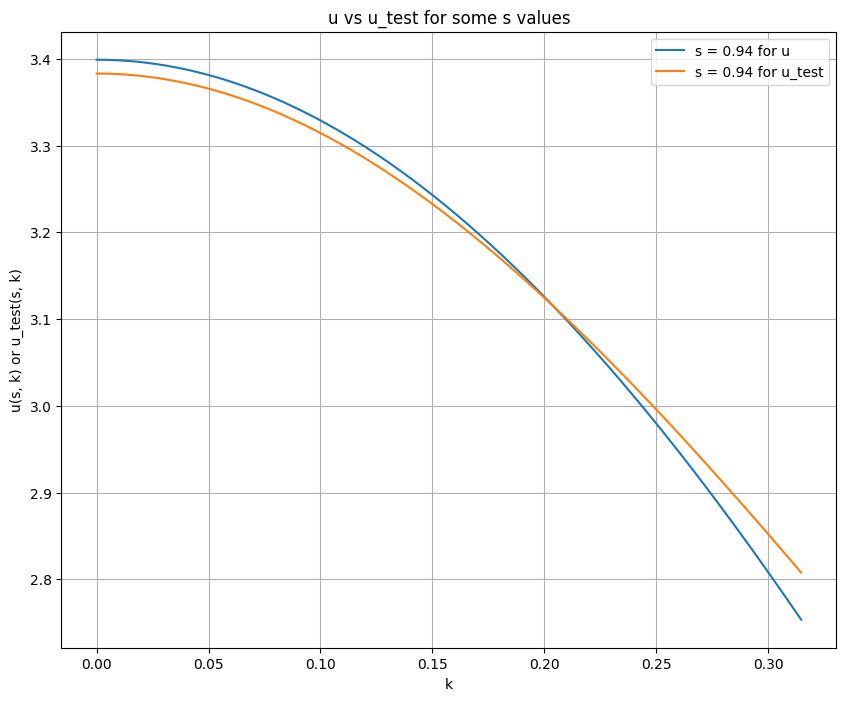

average difference for s = 0.95 : 0.016032171957828138


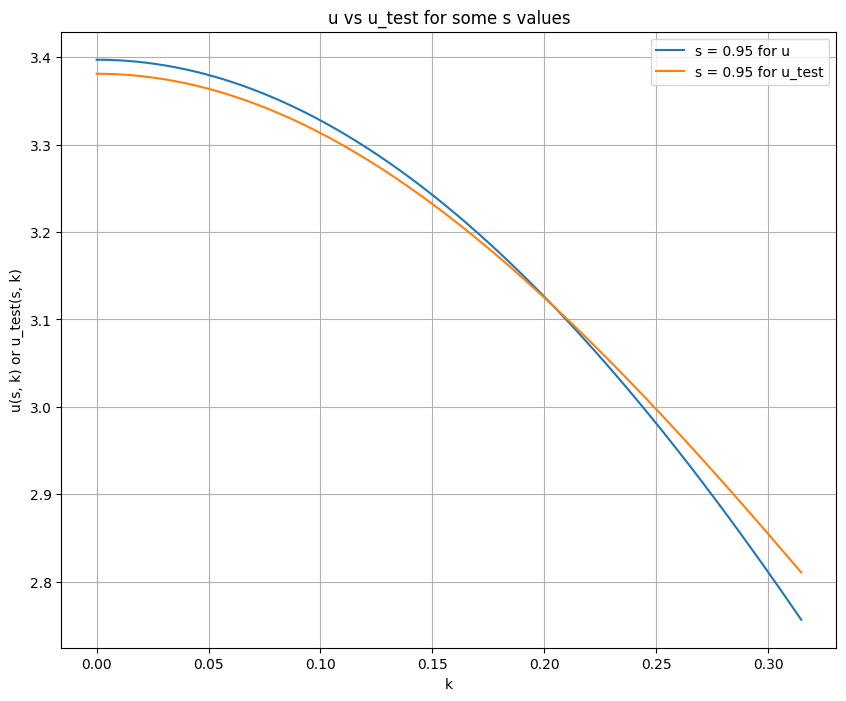

average difference for s = 0.97 : 0.016037436109577235


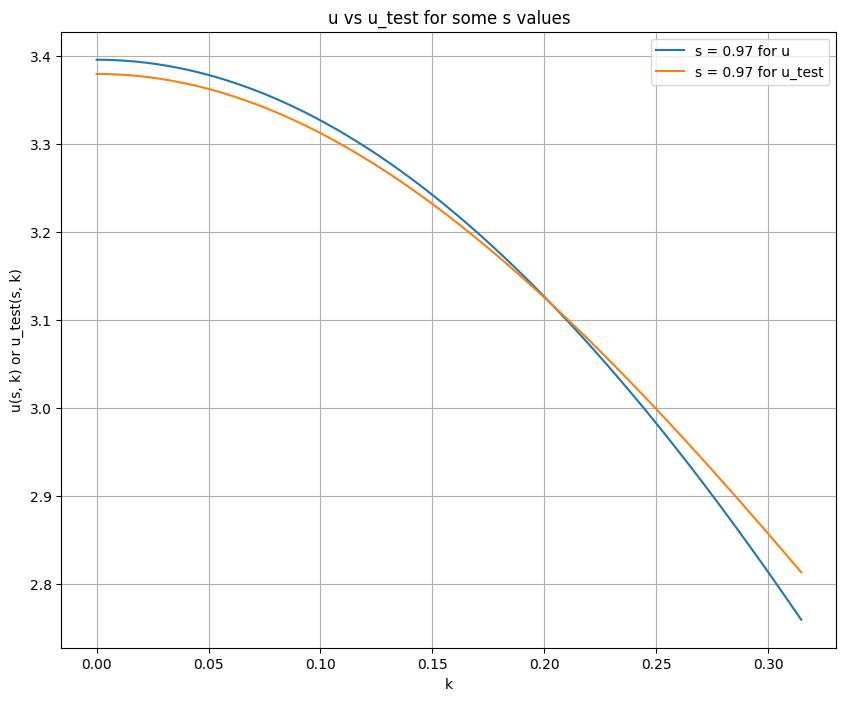

average difference for s = 0.98 : 0.016034167877465456


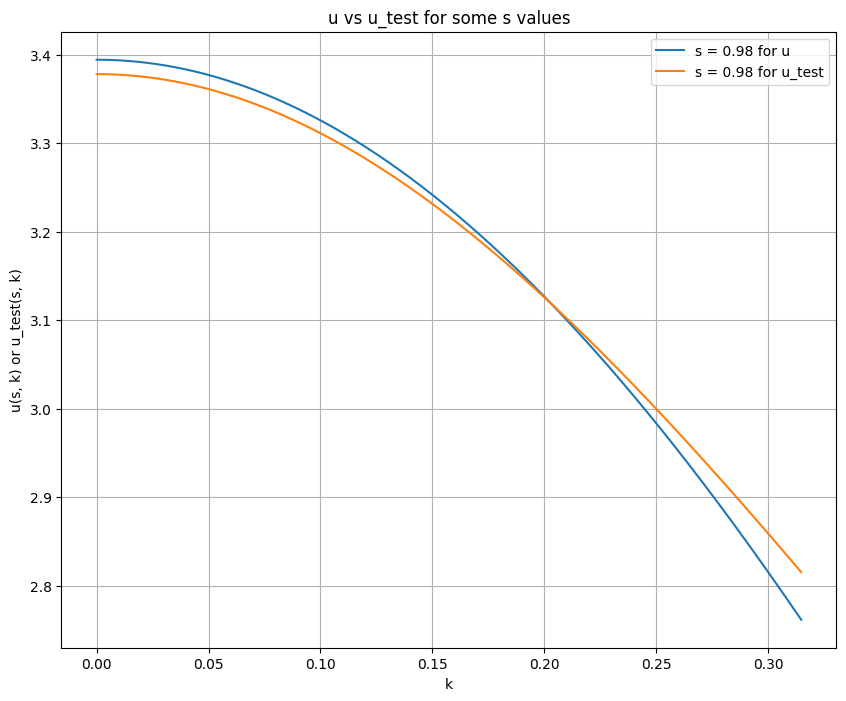

In [8]:
# compare u and u_test

for i in range(0, s_vals.shape[0], s_vals.shape[0]//50):
    if i == 0:
        continue
    plt.figure(figsize=(10, 8))
    plt.title("u vs u_test for some s values")
    plt.xlabel("k")
    plt.ylabel("u(s, k) or u_test(s, k)")
    # plt.ylim(0)
    plt.grid()
    plt.plot(k_vals, u[i, :], label=f"s = {s_vals[i]:.2f} for u")
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f} for u_test")
    print(f"average difference for s = {s_vals[i]:.2f} : {np.mean(np.abs(u[i, :]-u_test[i, :]))}")
    plt.legend()
    plt.show()

# plt.legend()
# plt.show()